# Plotting the sparsity pattern of a matrix

Matplotlib contains the [spy][] method for plotting the sparsity pattern of a
matrix. However, the routine does not choose the `markersize` in any useful
way, causing the marker boxes for neighboring elements to either be
separated by white space or to overlap, as in the example below (using the
27×27 sparse matrix in [sparse.npz](sparse.npz)):

[spy]: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.spy

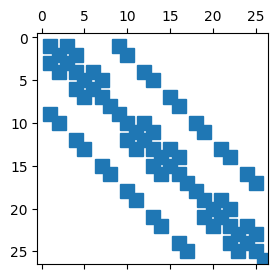

In [1]:
import matplotlib.pylab as plt
import scipy.sparse
H = scipy.sparse.load_npz('sparse.npz')
fig, ax = plt.subplots(figsize=(3, 3))
ax.spy(H)

The following custom `spy` routine generates a similar plot, but uses markers of
the correct size by drawing manual rectangles on the canvas.

In [2]:
def spy(m, ax):
    from scipy.sparse import coo_matrix
    from matplotlib.patches import Rectangle
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    for (x, y) in zip(m.col, m.row):
        ax.add_artist(Rectangle(
            xy=(x-0.5, y-0.5), width=1, height=1))
    ax.set_xlim(-0.5, m.shape[1]-0.5)
    ax.set_ylim(-0.5, m.shape[0]-0.5)
    ax.invert_yaxis()
    ax.set_aspect(float(m.shape[0])/float(m.shape[1]))


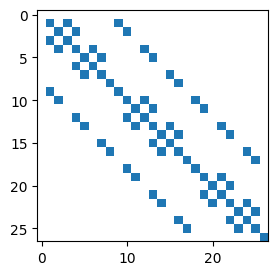

In [3]:
fig, ax = plt.subplots(figsize=(3, 3))
spy(H, ax)

The ticks mark the center of the marker for each element. Note that the 0-0
element in the top left corner is zero.